<a href="https://colab.research.google.com/github/alexeynick/msu_oil_gas/blob/main/module3_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задачи модуля №3

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit

In [ ]:
anno_font = dict(
        family="arial bold",
        size=18,
        color="Black"
    )

## Задача 3.1 Расчет обводненности скважины через плотность жидкости

С помощью фактических замеров (плотномер) определена плотность жидкости $\rho_{Ж} = 0,920\;г/см^3$, плотность нефти в поверхностных условиях (отчеты по исследованиям глубинных проб) $\rho_{Н} = 0,896\;г/см^3$, плотность воды в поверхностных условиях (отчеты по исследованиям глубинных проб, важно понимать какая это вода) $\rho_{В} = 1, 010\;г/см^3$.

Рассчитать:
- обводненность скважины
- обводненность скважины с замеренной плотностью жидкости -0,900 г/см3, и -0,910 г/см3

### Расчеты

$\rho_{Ж} = \rho_{Н} \cdot (1 - S_{В}) + \rho_{В} \cdot S_{В}$

$S_{В} = \cfrac{\rho_{Ж} - \rho_{Н}}{\rho_{В} - \rho_{Н}}$

Обводненность (объемная) = $(1 - S_{В})$

In [ ]:
rho_n_value = 0.896
rho_v_value = 1.01

In [ ]:
for rho_g_value in (0.92, 0.91, 0.90):
  s_value = (rho_g_value - rho_n_value) / (rho_v_value - rho_n_value)
  print('Обводненность скважины при плотности жидкости {0:,.3f} равна: {1:,.3f}'.format(rho_g_value, s_value))

Обводненность скважины при плотности жидкости 0.920 равна: 0.211
Обводненность скважины при плотности жидкости 0.910 равна: 0.123
Обводненность скважины при плотности жидкости 0.900 равна: 0.035


## Задача 3.2 Расчет забойного давления скважины через плотность жидкости


Дано:
- глубина скважины по вертикали $H = 1000\;м$ (из инклинометрии по скважине)
- глубина уровня в скважине по вертикали $H_{СТ} = 107,63\;м$ (расстояние от дневной поверхности)
- устьевое давление $P_{У} = 5 \;атм$
- плотность жидкости в скважине $\rho_{Ж} = 942\;кг/м^3$

Рассчитать:
- забойное давление $P_{З}$ в МПа, атм

### Расчеты

$P_{З} = P_{СТ} + P_{У}$

где:
- $P_{СТ}$ - давление столба жидкости в скважине

$P_{З} = \rho_{Ж} \cdot g \cdot h + P_{У}$

$P_{З} = \rho_{Ж} \cdot g \cdot (H - H_{СТ}) + P_{У}$


In [ ]:
ATM_TO_PA = 101325
G_VALUE = 9.81
SECONDS_IN_HOUR = 3600

In [ ]:
rho_g_value = 942
h_total = 1000
h_st = 107.63
p_ust = 5

In [ ]:
p_zab = rho_g_value * G_VALUE * (h_total - h_st) + p_ust * ATM_TO_PA

print('Забойное давление равно: {0:,.2f} МПа'.format(p_zab / 10**6))
print('Забойное давление равно: {0:,.2f} атм'.format(p_zab / ATM_TO_PA))

Забойное давление равно: 8.75 МПа
Забойное давление равно: 86.39 атм


## Задача 3.3 Определение коэффициента продуктивности скважины при обработке индикаторной диаграммы (метод установившихся отборов) (нефтяная)

In [ ]:
data = {
    'delta_p' : [10, 20, 30, 40, 50],
    'Q': [11.5, 20, 27, 34.6, 39.7]
}

df_data = pd.DataFrame(
    data, 
    columns = ['delta_p','Q']
    )

df_data['dpq'] = df_data['delta_p'] / df_data['Q']
df_data['dpq'] = df_data['dpq'].fillna(0)
df_data

,delta_p,Q,dpq
0,10,11.5,0.869565
1,20,20.0,1.000000
2,30,27.0,1.111111
3,40,34.6,1.156069
4,50,39.7,1.259446


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['delta_p'], y=df_data['Q'],
                    mode='lines+markers',
                    name='linear'))

fig.show()

In [ ]:
#fig = go.Figure()

#fig.add_trace(go.Scatter(x=df_data['dpq'], y=df_data['Q'],
#                    mode='lines+markers',
#                    name='non-linear'))

#fig.show()

In [ ]:
def line_func(x, a, b):
    return a + b * x

In [ ]:
popt, pcov = curve_fit(line_func, df_data['delta_p'], df_data['Q'])
popt

array([5.25999998, 0.71      ])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['delta_p'], y=df_data['Q'],
                    mode='lines+markers',
                    name='linear'))

fig.add_trace(go.Scatter(x=df_data['delta_p'], y=line_func(df_data['delta_p'], *popt),
                    mode='lines+markers',
                    name='linear appr'))

fig.show()

## Задача 3.6 Гидропрослушивание (Interference Testing)

Цель работы - определить свойства пласта (пьезопроводность, гидропроводность и проницаемость) в межскважинном пространстве по результатам гидропрослушивания.


Дано:
- расстояние между скважинами $R = 504\;м$
- глубина пласта $H = 786\;м$
- толщина пласта $h = 1\;м$
- вязкость нефти $\mu = 7.4\;сПз$
- плотность нефти $\rho = 833\;кг/м^3$ 
- динамический уровень (начальный) $h_{ДИН} = 220\;м$
- дебит возмущающей скважины $Q_{ВС} = 78\;м^3/сут$


Отслеживайте изменение динамического уровня жидкости в реагирующей скважине. Исходной информацией для дальнейших расчётов является зависимость динамического уровня в реагирующей скважине от времени $h_{ДИН} = f(t)$



In [ ]:
R_value = 504
H_value = 786
h_plast = 1
mu_value = 7.4
rho_value = 833
h_dyn = 220
Q_value = 78



In [ ]:
data = {
    'h' : [220, 220, 221, 223, 227, 229, 232, 233, 235, 237, 239, 241, 242, 243, 245, 246, 249, 251, 255, 258, 260, 263, 266, 269, 271, 277, 281, 284, 288, 290, 292],
    't':  [  0,   3,   6,   9,  12,  14,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  28,  30,  33,  35,  37,  40,  42,  45,  48,  53,  58,  62,  66,  69,  72]
}

df_data = pd.DataFrame(
    data, 
    columns = ['h','t']
    )

p_zab0 = rho_value * G_VALUE * (H_value - h_dyn)

df_data['t'] = df_data['t'] * SECONDS_IN_HOUR
df_data['p_zab'] = rho_value * G_VALUE * (H_value - df_data['h'])
df_data['delta_p'] = df_data['p_zab'] - p_zab0
df_data['delta_p_1'] = df_data['delta_p'].shift(1) - df_data['delta_p']
df_data['t_diff'] = df_data['t'].diff()
df_data['delta_p_2'] = df_data['delta_p_1'] / df_data['t_diff']
df_data['t_inv'] = (1 / df_data['t'] + 1 / df_data['t'].shift()) / 2
df_data['t_inv_delta_p'] = df_data['t_inv'] * df_data['delta_p_1']
df_data['phi'] = df_data['t_inv_delta_p'].cumsum()
df_data['ln_phi'] = np.log(df_data['phi'])

df_data = df_data.dropna()
df_data

,h,t,p_zab,delta_p,delta_p_1,t_diff,delta_p_2,t_inv,t_inv_delta_p,phi,ln_phi
2,221,21600,4617027.45,-8171.73,8171.73,10800.0,0.756642,0.000069,0.567481,0.567481,-0.566548
3,223,32400,4600683.99,-24515.19,16343.46,10800.0,1.513283,0.000039,0.630535,1.198016,0.180667
4,227,43200,4567997.07,-57202.11,32686.92,10800.0,3.026567,0.000027,0.882749,2.080765,0.732735
5,229,50400,4551653.61,-73545.57,16343.46,7200.0,2.269925,0.000021,0.351298,2.432063,0.888740
6,232,57600,4527138.42,-98060.76,24515.19,7200.0,3.404888,0.000019,0.456012,2.888074,1.060590
7,233,61200,4518966.69,-106232.49,8171.73,3600.0,2.269925,0.000017,0.137698,3.025772,1.107166
8,235,64800,4502623.23,-122575.95,16343.46,3600.0,4.539850,0.000016,0.259632,3.285404,1.189490
9,237,68400,4486279.77,-138919.41,16343.46,3600.0,4.539850,0.000015,0.245577,3.530981,1.261576
10,239,75600,4469936.31,-155262.87,16343.46,7200.0,2.269925,0.000014,0.227561,3.758542,1.324031
11,241,79200,4453592.85,-171606.33,16343.46,3600.0,4.539850,0.000013,0.211270,3.969812,1.378719


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['t'], y=df_data['delta_p_2'] / 101325,
                    mode='lines+markers',
                    name='linear'))

fig.update_layout( 
     xaxis=dict(
        #range=[0, 150],
        #title="Давление, МПа",
    ), 
     yaxis=dict(
        #range=[-0.1, 0.25],
        #title="Давление, МПа",
    ),   

    autosize=False,
    width=1000,
    height=700
)


fig.show()

In [ ]:
df_data_gr = df_data[4:12]
df_data_gr

,h,t,p_zab,delta_p,delta_p_1,t_diff,delta_p_2,t_inv,t_inv_delta_p,phi,ln_phi
6,232,57600,4527138.42,-98060.76,24515.19,7200.0,3.404888,0.000019,0.456012,2.888074,1.060590
7,233,61200,4518966.69,-106232.49,8171.73,3600.0,2.269925,0.000017,0.137698,3.025772,1.107166
8,235,64800,4502623.23,-122575.95,16343.46,3600.0,4.539850,0.000016,0.259632,3.285404,1.189490
9,237,68400,4486279.77,-138919.41,16343.46,3600.0,4.539850,0.000015,0.245577,3.530981,1.261576
10,239,75600,4469936.31,-155262.87,16343.46,7200.0,2.269925,0.000014,0.227561,3.758542,1.324031
11,241,79200,4453592.85,-171606.33,16343.46,3600.0,4.539850,0.000013,0.211270,3.969812,1.378719
12,242,82800,4445421.12,-179778.06,8171.73,3600.0,2.269925,0.000012,0.100935,4.070747,1.403827
13,243,86400,4437249.39,-187949.79,8171.73,3600.0,2.269925,0.000012,0.096636,4.167384,1.427288


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=1 / df_data_gr['t'], y=df_data_gr['ln_phi'],
                    mode='lines+markers',
                    name='linear'))

fig.update_layout( 
    autosize=False,
    width=1000,
    height=700
)


fig.show()

In [ ]:
popt, pcov = curve_fit(line_func, 1 / df_data_gr['t'], df_data_gr['ln_phi'])
popt

array([ 2.19582899e+00, -6.54606188e+04])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=1 / df_data_gr['t'], y=df_data_gr['ln_phi'],
                    mode='lines+markers',
                    name='linear'))

fig.add_trace(go.Scatter(x=1 / df_data_gr['t'], y=line_func(1 / df_data_gr['t'], *popt),
                    mode='lines+markers',
                    name='linear appr'))

fig.update_layout( 
    

    autosize=False,
    width=1000,
    height=700
)


fig.show()

In [ ]:
print('Коэффициенты уравнения прямой Ax+B: \nA: {0:,.2f} \nB: {1:,.2f}'.format(popt[1], popt[0]))

Коэффициенты уравнения прямой Ax+B: 
A: -65,460.62 
B: 2.20


In [ ]:
kappa = R_value ** 2 / (4 * np.abs(popt[1]))
epsilon = (Q_value / (24 * SECONDS_IN_HOUR)) * kappa / (np.pi * R_value ** 2 * np.exp(popt[0]))
k_value = epsilon * mu_value * 10 ** -3 / h_plast

print('Коэффициент пьезопроводности пласта: {0:,.3f}'.format(kappa))
print('Коэффициент гидропроводности пласта: {0:,.2e}'.format(epsilon))
print('Коэффициент проницаемости пласта: {0:,.2e}'.format(k_value))

Коэффициент пьезопроводности пласта: 0.970
Коэффициент гидропроводности пласта: 1.22e-10
Коэффициент проницаемости пласта: 9.04e-13


## Задача 3.7 Измерение коэффициента абсолютной проницаемости (VirtualPetroLab, Lab2)

Лабораторная работа №2. Цель - измерение коэффициента абсолютной проницаемости горной породы. Для выполнения необходим образец керна, подготовленный в ходе лабораторной работы №1.

Рассчитать:
- построить график зависимости коэффициента проницаемости по газу $K_{Г}$ от $1/P_{СР}$, найти по графику коэффициент абсолютной проницаемости.

In [ ]:
data = {
    'p_inv' : [0.3, 0.32, 0.35, 0.38, 0.42, 0.48, 0.55],
    'k':  [0.64, 0.65, 0.66, 0.68, 0.69, 0.71, 0.73]
}

df_data = pd.DataFrame(
    data, 
    columns = ['p_inv','k']
    )

df_data

,p_inv,k
0,0.30,0.64
1,0.32,0.65
2,0.35,0.66
3,0.38,0.68
4,0.42,0.69
5,0.48,0.71
6,0.55,0.73


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['p_inv'], y=df_data['k'],
                    mode='lines+markers',
                    name='linear'))

fig.update_layout( 
    autosize=False,
    width=1000,
    height=700
)


fig.show()

In [ ]:
popt, pcov = curve_fit(line_func, df_data['p_inv'], df_data['k'])
popt

array([0.53596708, 0.3600823 ])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['p_inv'], y=df_data['k'],
                    mode='lines+markers',
                    name='linear'))

fig.add_trace(go.Scatter(x=df_data['p_inv'], y=line_func(df_data['p_inv'], *popt),
                    mode='lines+markers',
                    name='linear'))

fig.add_annotation(x=0.4, y=0.72, text="y = {0:.3f}x + {1:.3f}".format(popt[1], popt[0]), showarrow=False, yshift=10, font=anno_font)

fig.update_layout( 
    autosize=False,
    width=1000,
    height=700
)


fig.show()

In [ ]:
print('Коэффициент абсолютной проницаемости: {0:,.3f}'.format(popt[0]))

Коэффициент абсолютной проницаемости: 0.536


## Задача 3.8 Измерение динамической вязкости с помощью ротационного вискозиметра (Virtual Viscometer)

Ротационные вискозиметры используют для измерения вязкости нефтей и нефтепродуктов, смазочных материалов, лаков и красок, пищевых продуктов и 
других жидкостей. Принцип работы ротационного вискозиметра основан на вращении 
измерительного цилиндра («шпинделя», англ. – «spindle») в исследуемой жидкости с помощью электродвигателя прибора. 

Процесс измерения вязкости заключается в следующем: с помощью вискозиметра задают угловую скорость вращения шпинделя 𝑅𝑃𝑀 (rate per minute – обороты в минуту) и определяют соответствующее ему значение относительного момента 𝑀отн

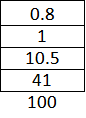

In [ ]:
#data = {
#    'rpm' : [0.3, 0.6, 1.5, 3, 6, 12],
#    'M':    [1.1, 3.1, 7.9, 15.5, 31.2, 63],
#    'M':    [2, 4, 9.5, 19, 38, 75.5],
#    'M':    [0.7, 1.5, 4, 7, 14, 29.5, 73],
#    'factor' : [200, 100, 40, 20, 10, 5],
#}

data = {
    'rpm' : [0.3, 0.6, 1.5, 3, 6, 12, 30],
    'M':    [0.7, 1.5, 4, 7, 14, 29.5, 73],
    'factor' : [200, 100, 40, 20, 10, 5, 2],
}

df_data = pd.DataFrame(
    data, 
    columns = ['rpm','M', 'factor']
    )

df_data['shpnd'] = 3
df_data['mu'] = df_data['M'] * df_data['factor']
df_data['speed'] = df_data['rpm'] * 0.22
df_data['tau'] = df_data['speed'] * df_data['mu']

df_data

,rpm,M,factor,shpnd,mu,speed,tau
0,0.3,0.7,200,3,140.0,0.066,9.24
1,0.6,1.5,100,3,150.0,0.132,19.80
2,1.5,4.0,40,3,160.0,0.330,52.80
3,3.0,7.0,20,3,140.0,0.660,92.40
4,6.0,14.0,10,3,140.0,1.320,184.80
5,12.0,29.5,5,3,147.5,2.640,389.40
6,30.0,73.0,2,3,146.0,6.600,963.60


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['speed'], y=df_data['tau'],
                    mode='lines+markers',
                    name='linear'))

fig.update_layout( 
    autosize=False,
    width=700,
    height=700
)


fig.show()

In [ ]:
def pow_func(x, a, b):
    return a + x ** b

In [ ]:
def line_func2(x, a):
    return a * x

In [ ]:
popt, pcov = curve_fit(pow_func, df_data['speed'], df_data['tau'], p0 = [1, 2])
popt

array([118.11210933,   3.57455684])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_data['speed'], y=df_data['tau'],
                    mode='lines+markers',
                    name='linear'))

fig.add_trace(go.Scatter(x=df_data['speed'], y=pow_func(df_data['speed'], *popt),
                    mode='lines+markers',
                    name='linear'))

fig.update_layout( 
    autosize=False,
    width=1000,
    height=700
)


fig.show()

## Задача 3.9 Взаимная проницаемость, функция обводненности

Дано:

Зависимость коэффициентов проницаемости воды и нефти в зависимости от обводненности S. 

Рассчитать:
- построить график зависимости коэффициентов проницаемости воды и нефти в зависимости от обводненности.
- построить график функции обводненности

In [ ]:
s_arr = []

for i in range(20, 81, 5):
  s_arr.append(i/100)

for i in range(90, 101, 10):
  s_arr.append(i/100)


data = {
    'S' : s_arr,
}

df_data = pd.DataFrame(
    data, 
    columns = ['S']
    )

df_data['k_v'] = df_data.apply(lambda row: 0 if row['S'] <= 0.2 else ((row['S'] - 0.2) / 0.75) ** 2, axis = 1)
df_data['k_n'] = df_data.apply(lambda row: None if row['S'] < 0.2 else (0 if row['S'] >= 0.75 else (1 - row['S'] / 0.75) ** 2), axis = 1)

mu_water = 1
for mu in [2, 4, 40, 140]:
  df_data['fs_{0}'.format(mu)] = (df_data['k_v'] / mu_water) / (df_data['k_v'] / mu_water + df_data['k_n'] / mu)

df_data

,S,k_v,k_n,fs_2,fs_4,fs_40,fs_140
0,0.20,0.000000,0.537778,0.000000,0.000000,0.000000,0.000000
1,0.25,0.004444,0.444444,0.019608,0.038462,0.285714,0.583333
2,0.30,0.017778,0.360000,0.089888,0.164948,0.663900,0.873635
3,0.35,0.040000,0.284444,0.219512,0.360000,0.849057,0.951662
4,0.40,0.071111,0.217778,0.395062,0.566372,0.928882,0.978593
5,0.45,0.111111,0.160000,0.581395,0.735294,0.965251,0.989819
6,0.50,0.160000,0.111111,0.742268,0.852071,0.982935,0.995064
7,0.55,0.217778,0.071111,0.859649,0.924528,0.991903,0.997673
8,0.60,0.284444,0.040000,0.934307,0.966038,0.996497,0.998997
9,0.65,0.360000,0.017778,0.975904,0.987805,0.998767,0.999647


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['k_v'],
                    mode='lines+markers',
                    name='К воды'))

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['k_n'],
                    mode='lines+markers',
                    name='K нефти'))

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['fs_2'],
                    mode='lines',
                    name='Функция обводненности (вязкость нефти = 2)'))

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['fs_4'],
                    mode='lines',
                    name='Функция обводненности (вязкость нефти = 4)'))

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['fs_40'],
                    mode='lines',
                    name='Функция обводненности (вязкость нефти = 40)'))

fig.add_trace(go.Scatter(x= df_data['S'], y=df_data['fs_140'],
                    mode='lines',
                    name='Функция обводненности (вязкость нефти = 140)'))

fig.update_layout( 
    yaxis=dict(
        range=[-0.1, 1.1],
        #title="Давление, МПа",
    ), 

    autosize=False,
    width=1200,
    height=700
)


fig.show()

## Задача 3.5

In [ ]:
df_graph = pd.read_csv('https://raw.githubusercontent.com/alexeynick/msu_oil_gas/main/datasets/task_35_data.csv')
df_graph.columns=['vnk', 'oil']
df_graph.head(5)

,vnk,oil
0,0.133980,23210.93
1,0.140033,23356.61
2,0.205795,23458.07
3,0.244604,23499.77
4,0.253296,23563.49


In [ ]:
popt, pcov = curve_fit(line_func, df_graph['oil'], df_graph['vnk'])
popt

array([-3.68889448e+00,  1.63653285e-04])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_graph['oil'], y=df_graph['vnk'],
                    mode='markers',
                    name='src'))

fig.add_trace(go.Scatter(x=df_graph['oil'], y=line_func(df_graph['oil'], *popt),
                    mode='lines+markers',
                    name='linear appr'))

fig.update_layout( 
    xaxis=dict(
        range=[0, 50000],
        #tickmode = 'array',
        #tickvals = df_object2['year'],
        tickangle=-45,
        title='Год',
    ),

    yaxis=dict(
        range=[0, 21],
        title="Число скажин (шт)",
        titlefont=dict(
            color="green"
        ),
        tickfont=dict(
            color="green"
        )
    ),
)

fig.show()